In [274]:
# Necessary Library
%matplotlib inline
import pandas as pd
import numpy as np
import pandas_profiling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import roc_auc_score, confusion_matrix, recall_score, precision_score
from sklearn.metrics import roc_curve, precision_recall_curve, classification_report

import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [94]:
#load the data to dataframe
data = pd.read_csv("bank-additional-full.csv", sep = ";")

# Preprocessing

In [95]:
pandas_profiling.ProfileReport(data)

Number of variables,21
Number of observations,41188
Total Missing (%),0.0%
Total size in memory,6.6 MiB
Average record size in memory,168.0 B
Numeric,8
Categorical,11
Boolean,0
Date,0
Text (Unique),0
Rejected,2


In [110]:
data.duplicated().sum()

12

In [111]:
data.drop_duplicates(inplace = True)

In [112]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [301]:
data['y'].value_counts()

0    35305
1     4486
Name: y, dtype: int64

In [113]:
data["y"].unique()

array(['no', 'yes'], dtype=object)

In [114]:
data["y"].replace({"yes":1,"no":0}, inplace = True)

##### duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [115]:
data.drop(columns="duration", inplace = True)

In [116]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [117]:
data["month"].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [118]:
data["day_of_week"].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [119]:
data["job"].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [120]:
data["job"].value_counts()

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [121]:
data = data[data["job"]!="unknown"]

In [122]:
data["job"].value_counts()

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64

In [123]:
data["marital"].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [124]:
data["marital"].value_counts()

married     24687
single      11490
divorced     4598
unknown        71
Name: marital, dtype: int64

In [125]:
data = data[data["marital"]!="unknown"]

In [126]:
data["marital"].value_counts()

married     24687
single      11490
divorced     4598
Name: marital, dtype: int64

In [127]:
data["education"].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [128]:
data["education"].value_counts()

university.degree      12092
high.school             9461
basic.9y                6006
professional.course     5222
basic.4y                4118
basic.6y                2263
unknown                 1595
illiterate                18
Name: education, dtype: int64

In [129]:
np.where(data["education"]=="basic.9y","basic",data["education"])

array(['basic.4y', 'high.school', 'high.school', ..., 'university.degree',
       'professional.course', 'professional.course'], dtype=object)

In [130]:
data["education"] = data["education"].replace({"basic.4y":"basic","basic.6y":"basic","basic.9y":"basic"})

In [131]:
data["education"].value_counts()

basic                  12387
university.degree      12092
high.school             9461
professional.course     5222
unknown                 1595
illiterate                18
Name: education, dtype: int64

In [132]:
data.loc[data["education"]=="unknown","education"] = np.NAN

In [133]:
data["education"].value_counts()

basic                  12387
university.degree      12092
high.school             9461
professional.course     5222
illiterate                18
Name: education, dtype: int64

In [134]:
data["education"].isna().sum()

1595

In [135]:
data["education"] = data.groupby("job")["education"].transform(lambda x : x.fillna(x.mode()[0]))

In [136]:
data["default"].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [137]:
data["default"].value_counts()

no         32337
unknown     8435
yes            3
Name: default, dtype: int64

In [138]:
pd.crosstab(data["default"],data["y"])

y,0,1
default,,
no,28180,4157
unknown,7999,436
yes,3,0


In [139]:
data[data["default"]=="yes"]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
21580,48,technician,married,professional.course,yes,no,no,cellular,aug,tue,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
21581,48,technician,married,professional.course,yes,yes,no,cellular,aug,tue,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
24866,31,unemployed,married,high.school,yes,no,no,cellular,nov,tue,2,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,0


##### Removing Default column as the labes are skewed towards "no" label 

In [140]:
data.drop(columns = "default", inplace = True)

In [141]:
data["housing"].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [142]:
data["housing"].value_counts()

yes        21371
no         18420
unknown      984
Name: housing, dtype: int64

In [143]:
data.loc[data["housing"]=="unknown","housing"] = np.NAN

In [144]:
data.dropna(subset=["housing"], inplace= True)

In [149]:
data["loan"].unique()

array(['no', 'yes'], dtype=object)

In [150]:
data["contact"].unique()

array(['telephone', 'cellular'], dtype=object)

In [151]:
data["month"].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [152]:
data["day_of_week"].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [153]:
data["campaign"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 18, 23, 14, 22,
       25, 16, 17, 15, 19, 20, 39, 35, 42, 28, 26, 27, 32, 21, 24, 29, 31,
       30, 41, 37, 40, 33, 34, 43])

#### 999 - actually never called
#### by real time data we have it denotes we called 999 days back it is less significant. So, Keeping as it is.

#### Note: Feel free to change it and use it

In [154]:
data["pdays"].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   9,  11,   2,   8,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20])

In [155]:
data["previous"].unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [156]:
data["previous"].value_counts()

0    34360
1     4412
2      722
3      207
4       66
5       18
6        5
7        1
Name: previous, dtype: int64

In [157]:
pd.crosstab(data["previous"],data["y"])

y,0,1
previous,,
0,31310,3050
1,3482,930
2,392,330
3,83,124
4,30,36
5,5,13
6,2,3
7,1,0


In [158]:
data["poutcome"].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

# Explorartory Data Analysis(EDA)

In [159]:
data.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [160]:
data.shape

(39791, 19)

In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39791 entries, 0 to 41187
Data columns (total 19 columns):
age               39791 non-null int64
job               39791 non-null object
marital           39791 non-null object
education         39791 non-null object
housing           39791 non-null object
loan              39791 non-null object
contact           39791 non-null object
month             39791 non-null object
day_of_week       39791 non-null object
campaign          39791 non-null int64
pdays             39791 non-null int64
previous          39791 non-null int64
poutcome          39791 non-null object
emp.var.rate      39791 non-null float64
cons.price.idx    39791 non-null float64
cons.conf.idx     39791 non-null float64
euribor3m         39791 non-null float64
nr.employed       39791 non-null float64
y                 39791 non-null int64
dtypes: float64(5), int64(5), object(9)
memory usage: 6.1+ MB


In [162]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,39791.0,39.979945,10.402073,17.000,32.000,38.000,47.000,98.000
campaign,39791.0,2.566409,2.763612,1.000,1.000,2.000,3.000,43.000
pdays,39791.0,962.665929,186.440364,0.000,999.000,999.000,999.000,999.000
previous,39791.0,0.172602,0.494060,0.000,0.000,0.000,0.000,7.000
emp.var.rate,39791.0,0.079822,1.569570,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,39791.0,93.573361,0.577877,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,39791.0,-40.521301,4.627854,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,39791.0,3.618799,1.734234,0.634,1.344,4.857,4.961,5.045
nr.employed,39791.0,5167.032970,72.204632,4963.600,5099.100,5191.000,5228.100,5228.100
y,39791.0,0.112739,0.316278,0.000,0.000,0.000,0.000,1.000


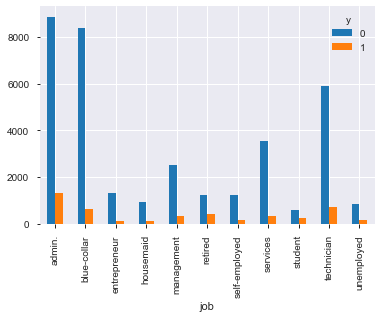

In [163]:
pd.crosstab(data["job"],data["y"]).plot(kind = "bar")

In [164]:
pd.crosstab(data["job"],data["y"])

y,0,1
job,,
admin.,8858,1320
blue-collar,8381,619
entrepreneur,1297,120
housemaid,925,103
management,2526,324
retired,1246,423
self-employed,1229,147
services,3544,316
student,587,264


In [165]:
pd.crosstab(data["job"],data["y"]).sum(1)

job
admin.           10178
blue-collar       9000
entrepreneur      1417
housemaid         1028
management        2850
retired           1669
self-employed     1376
services          3860
student            851
technician        6580
unemployed         982
dtype: int64

In [166]:
pd.crosstab(data["job"],data["y"]).div(pd.crosstab(data["job"],data["y"]).sum(1), axis =0)

y,0,1
job,,
admin.,0.870309,0.129691
blue-collar,0.931222,0.068778
entrepreneur,0.915314,0.084686
housemaid,0.899805,0.100195
management,0.886316,0.113684
retired,0.746555,0.253445
self-employed,0.893169,0.106831
services,0.918135,0.081865
student,0.689777,0.310223


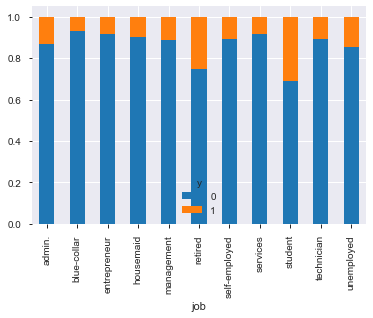

In [167]:
pd.crosstab(data["job"],data["y"]).div(pd.crosstab(data["job"],data["y"]).sum(1), axis =0).plot(kind = "bar", stacked= True)

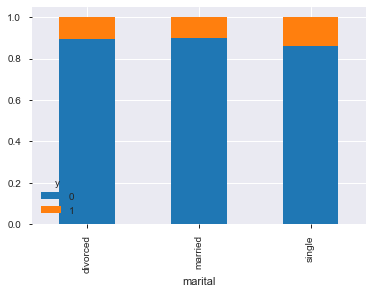

In [168]:
pd.crosstab(data["marital"],data["y"]).div(pd.crosstab(data["marital"],data["y"]).sum(1), axis =0).plot(kind = "bar", stacked= True)

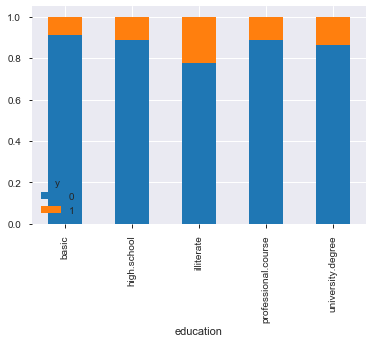

In [170]:
table = pd.crosstab(data["education"],data["y"])
plot_data = table.div(table.sum(1), axis =0)
plot_data.plot(kind = "bar", stacked= True)

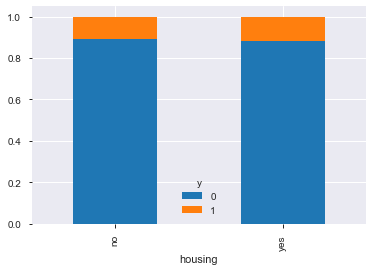

In [171]:
table = pd.crosstab(data["housing"],data["y"])
plot_data = table.div(table.sum(1), axis =0)
plot_data.plot(kind = "bar", stacked= True)

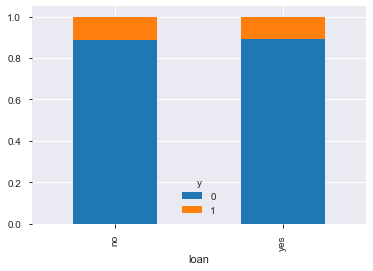

In [172]:
table = pd.crosstab(data["loan"],data["y"])
plot_data = table.div(table.sum(1), axis =0)
plot_data.plot(kind = "bar", stacked= True)

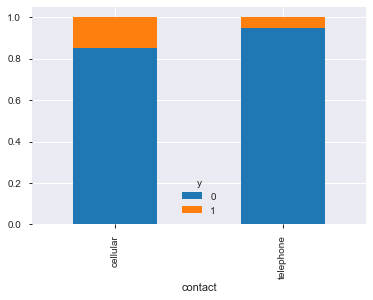

In [173]:
table = pd.crosstab(data["contact"],data["y"])
plot_data = table.div(table.sum(1), axis =0)
plot_data.plot(kind = "bar", stacked= True)

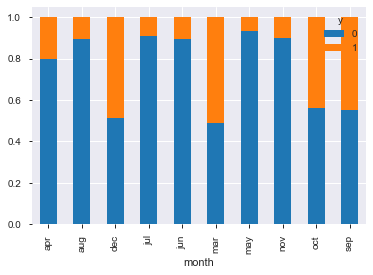

In [174]:

table = pd.crosstab(data["month"],data["y"])
plot_data = table.div(table.sum(1), axis =0)
plot_data.plot(kind = "bar", stacked= True)

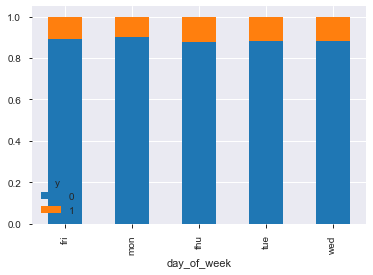

In [175]:
table = pd.crosstab(data["day_of_week"],data["y"])
plot_data = table.div(table.sum(1), axis =0)
plot_data.plot(kind = "bar", stacked= True)

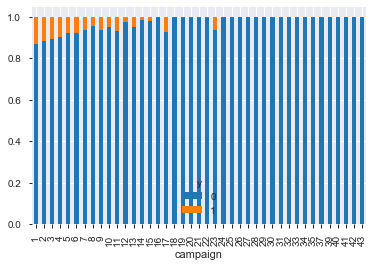

In [176]:
table = pd.crosstab(data["campaign"],data["y"])
plot_data = table.div(table.sum(1), axis =0)
plot_data.plot(kind = "bar", stacked= True)

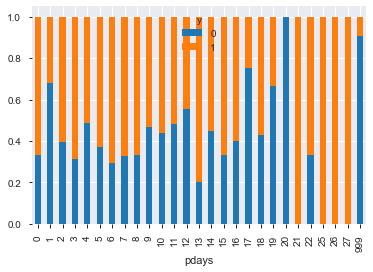

In [177]:
table = pd.crosstab(data["pdays"],data["y"])
plot_data = table.div(table.sum(1), axis =0)
plot_data.plot(kind = "bar", stacked= True)

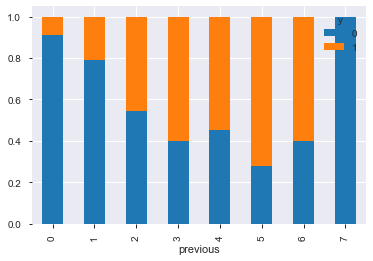

In [178]:
table = pd.crosstab(data["previous"],data["y"])
plot_data = table.div(table.sum(1), axis =0)
plot_data.plot(kind = "bar", stacked= True)

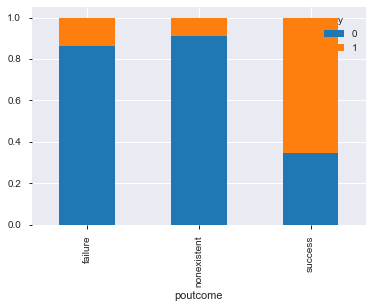

In [179]:
table = pd.crosstab(data["poutcome"],data["y"])
plot_data = table.div(table.sum(1), axis =0)
plot_data.plot(kind = "bar", stacked= True)

## Feauture Engineering

In [180]:
data.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y'],
      dtype='object')

In [181]:
data.dtypes

age                 int64
job                object
marital            object
education          object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

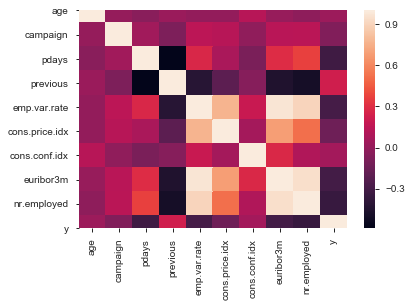

In [187]:
sns.heatmap(data.corr())


In [189]:
data.drop(columns = "previous", inplace = True)

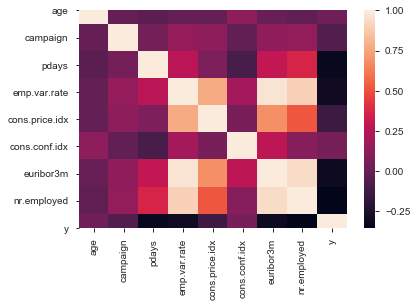

In [190]:
sns.heatmap(data.corr())


In [193]:
pandas_profiling.ProfileReport(data)

Number of variables,18
Number of observations,39791
Total Missing (%),0.0%
Total size in memory,5.5 MiB
Average record size in memory,144.0 B
Numeric,7
Categorical,9
Boolean,1
Date,0
Text (Unique),0
Rejected,1


In [192]:
data.drop(columns = "euribor3m", inplace = True)

In [195]:
cat_data = data.select_dtypes(exclude = np.number)

In [196]:
num_data = data.select_dtypes(include = np.number)

In [198]:
cat_col_encoded = pd.get_dummies(cat_data)

In [201]:
data_preprocessed = pd.concat([num_data, cat_col_encoded], axis = "columns")

## Modelling

In [204]:
X = data_preprocessed.drop(columns = "y")

In [205]:
y = data_preprocessed["y"]

In [211]:
std = StandardScaler()
X_std = std.fit_transform(X)

In [212]:
norm = MinMaxScaler()
X_norm = norm.fit_transform(X)

In [237]:
def roc_draw(X_test, y_test,logreg):
    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

In [299]:
def model_fit(model, X, y, roc = False, conf = False, threshold = 0.5):
    train_X, test_X, train_y, test_y =  train_test_split(X, y, test_size = 0.3, random_state=1)
    print(np.array(np.unique(test_y, return_counts=True)).T)
    model.fit(train_X, train_y)
    train_pred = model.predict(train_X)
    print("Train Accuracy : ",accuracy_score(train_pred,train_y))
    print("Train Recall : ",recall_score(train_y, train_pred))
    print("Train Precision : ",precision_score(train_y, train_pred))
    test_pred = model.predict(test_X)
    print("Test Accuracy : ",accuracy_score(test_pred,test_y))
    print("Test Recall : ",recall_score(test_y,test_pred))
    print("Test Precision : ",precision_score(test_y,test_pred))
    if roc:
        roc_draw(test_X, test_y, model)
    if conf:
        print("Test Data Confusion Matrix")
        print(confusion_matrix(test_pred,test_y))
    print("After Tuning Threshold")
    test_pred_prob = model.predict_proba(test_X)
    predict_threshold_test = np.where(test_pred_prob[:,1]>threshold,1,0)
    print("Test Accuracy : ",accuracy_score(predict_threshold_test,test_y))
    print("Test Recall : ",recall_score(test_y, predict_threshold_test))
    print("Test Precision : ",precision_score(test_y, predict_threshold_test))
    if conf:
        print("Test Data Confusion Matrix")
        print(confusion_matrix(predict_threshold_test,test_y))
        print(classification_report(test_y, predict_threshold_test))
    return model.predict_proba(train_X), model.predict_proba(test_X)


[[    0 10574]
 [    1  1364]]
Train Accuracy :  0.8999389652820163
Train Recall :  0.19442664958360026
Train Precision :  0.6905574516496018
Test Accuracy :  0.8990618194002346
Test Recall :  0.19281524926686217
Test Precision :  0.7166212534059946


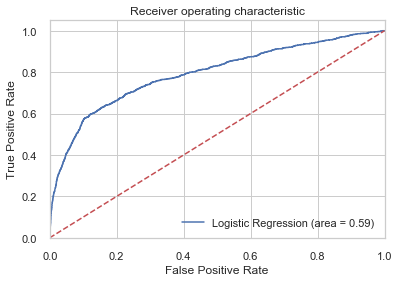

Test Data Confusion Matrix
[[10470  1101]
 [  104   263]]
After Tuning Threshold
Test Accuracy :  0.8858267716535433
Test Recall :  0.4208211143695015
Test Precision :  0.5004359197907585
Test Data Confusion Matrix
[[10001   790]
 [  573   574]]
             precision    recall  f1-score   support

          0       0.93      0.95      0.94     10574
          1       0.50      0.42      0.46      1364

avg / total       0.88      0.89      0.88     11938



In [300]:
logistic = LogisticRegression()
train_pred_prob, test_pred_prob = model_fit(logistic, X, y, roc = True, conf = True, threshold=0.3)

In [260]:
predict_threshold_test = np.where(test_pred_prob[:,1]>0.7,1,0)

In [ ]:
lo

In [279]:
data_preprocessed.y.value_counts()

0    35305
1     4486
Name: y, dtype: int64

In [295]:
np.where(logistic.predict_proba(X)[:,1]>0.5,1,0)

array([0, 0, 0, ..., 0, 0, 0])

In [294]:
logistic.predict_proba(X)

array([[0.96599118, 0.03400882],
       [0.9641755 , 0.0358245 ],
       [0.96667734, 0.03332266],
       ...,
       [0.56159297, 0.43840703],
       [0.58576921, 0.41423079],
       [0.6501325 , 0.3498675 ]])

In [218]:
model_fit(logistic, X_std, y)

Train Accuracy :  0.9000466736078699
Test Accuracy :  0.899815714525046


In [219]:
model_fit(logistic, X_norm, y)

Train Accuracy :  0.9004057013607152
Test Accuracy :  0.899731948400067


In [221]:
lasso = LogisticRegression(penalty="l1")
model_fit(lasso, X_std, y)

Train Accuracy :  0.9000466736078699
Test Accuracy :  0.899731948400067


In [223]:
knn = KNeighborsClassifier()
model_fit(knn, X_std, y)

Train Accuracy :  0.9124331310810325
Test Accuracy :  0.8913553359021612


In [227]:
nb = GaussianNB()
model_fit(nb, X_std, y)

Train Accuracy :  0.8678059814023624
Test Accuracy :  0.8715027642821243


In [229]:
bnb = BernoulliNB()
model_fit(bnb, X_std, y)

Train Accuracy :  0.8383657056690482
Test Accuracy :  0.8404255319148937


In [230]:
data.y.value_counts()

0    35305
1     4486
Name: y, dtype: int64

In [314]:
import imblearn
imblearn.__version__

'0.3.1'

In [302]:
from imblearn.under_sampling import NearMiss

In [303]:
undersample = NearMiss()

In [307]:
X_undersample, y_undersample = 
undersample.fit_sample(data_preprocessed.drop(columns="y"),
                       data_preprocessed["y"])

In [318]:
print(np.array(np.unique(y_undersample, return_counts=True)).T)


[[   0 4486]
 [   1 4486]]
